In [1]:
#Importing Files
import pandas as pd
train=pd.read_csv("bigdatamart_Train.csv")
test=pd.read_csv("bigdatamart_Test.csv")
train["Origin"]="train"
test["Origin"]="test"
df=pd.concat([train,test],ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [2]:
# Checking all Shape and Columns
print(df.shape)
df.columns


(14204, 13)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Origin'],
      dtype='object')

In [3]:
# Checking Correlations
df.corr()

#Item_MRP has 57% Correlation with our Target - Sales. Remaining features have close to no-correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [4]:
#Let's have a look at the datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Origin                        object
dtype: object

In [5]:
# It's important to further investigate the 'object' datatypes
for col in df.columns:
    if df[col].dtype=="object":
        print(col,"------------------------->>",df[col].nunique())
#item_identifier must be dropped otherwise 1559 unique categories will be produced when we do Label Encoding
#Also, Outlet_Identifier & Item_Type are having large numbers and might need more investigation

Item_Identifier ------------------------->> 1559
Item_Fat_Content ------------------------->> 5
Item_Type ------------------------->> 16
Outlet_Identifier ------------------------->> 10
Outlet_Size ------------------------->> 3
Outlet_Location_Type ------------------------->> 3
Outlet_Type ------------------------->> 4
Origin ------------------------->> 2


In [6]:
# Let's further investigate the value counts of individual features which have object data-type:
for col in df.columns:
    if df[col].dtype=="object":
        print(col,"\n",df[col].value_counts())
        
#In the feature - "Item_Fat_Content" - Low Fat, LF, low fat are the same category and can be merged as 1. Same with Regular and reg


Item_Identifier 
 FDS03    10
FDC37    10
FDP11    10
NCX05    10
NCO18    10
         ..
FDM52     7
FDH58     7
NCW54     7
NCL42     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Fat_Content 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Item_Type 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Outlet_Identifier 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OU

In [7]:
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

# Merged the Categories into Low Fat and Regular 

In [8]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Origin                          0
dtype: int64


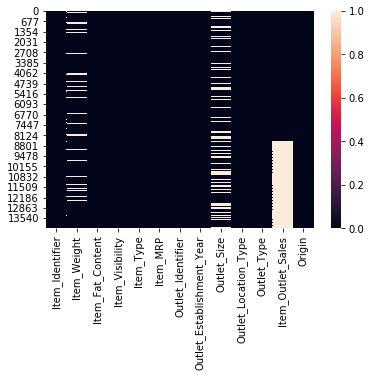

In [9]:
# Checking Null Values and Plotting heat map
import seaborn as sns
import matplotlib.pyplot as plt

print(df.isnull().sum())
sns.heatmap(df.isnull())



In [10]:
#There are null values for Item_Weight,Outlet_Size,Item_Outlet_Sales. Need to take action.

# Replacing Null values in Item_Identifier with mean (based on the Item_Identifier)
# Alternately :: df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'))

df["Item_Weight"]=df.groupby(["Item_Identifier"])['Item_Weight'].apply(lambda x: x.fillna(x.mean()))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Origin                          0
dtype: int64


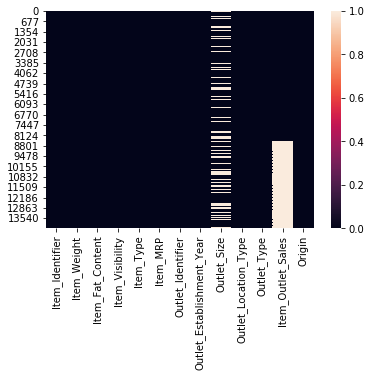

In [11]:
# Checking Null Values and Plotting heat map


print(df.isnull().sum())
sns.heatmap(df.isnull())

In [12]:
#Lets chcek the value counts of outlet size
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [13]:
# Replacing Null values in Outlet_Size with mode (based on the Outlet_Type)
df["Outlet_Size"]=df.groupby(["Outlet_Type"])['Outlet_Size'].apply(lambda x: x.fillna(x.mode()[0]))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Origin                          0
dtype: int64


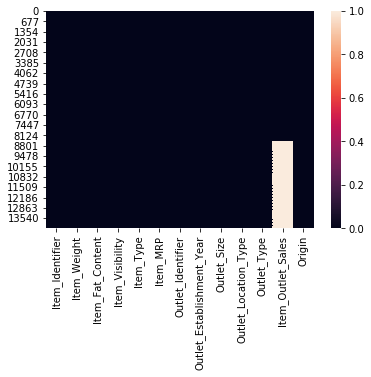

In [14]:
print(df.isnull().sum())
sns.heatmap(df.isnull())


In [15]:
#Replacing Null values in Item_Outlet_Sales with mean (based on the Item_Identifier)

df["Item_Outlet_Sales"]=df.groupby(["Item_Identifier"])['Item_Outlet_Sales'].apply(lambda x: x.fillna(x.mean()))
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Origin                       0
dtype: int64


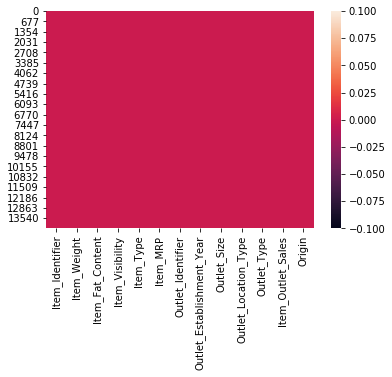

In [16]:
print(df.isnull().sum())
sns.heatmap(df.isnull())


In [17]:
#Label Encoding the required fields to convert categorical features into machine understandable features
# Features to be Encoded = ["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size","Outlet_Type"]
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,train
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,train
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,train
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,train
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,train


In [18]:
# Investigating further on Outlet_Establishment_Year
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [19]:
#Outlet_Establishment_Year can be converted into Number of years from 2013 (As Sales Data is for the year 2013)
df['Years']=2013-df['Outlet_Establishment_Year']

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin,Years
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,train,14
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,train,4
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,train,14
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,train,15
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,train,26


In [21]:
#Dropping df['Outlet_Establishment_Year']
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin,Years
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,train,14
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,1,2,2,443.4228,train,4
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,train,14
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,2,2,0,732.3800,train,15
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,0,2,1,994.7052,train,26


In [23]:
df.shape

(14204, 13)

In [24]:
# We need to check the skewness of ["Item_MRP","Item_Visibility","Item_Weight","Outlet__Years_of_operation"]
cols=["Item_MRP","Item_Visibility","Item_Weight","Years"]
for col in cols:
    print(col,df[col].skew())


Item_MRP 0.13072836040225863
Item_Visibility 1.1951751774587889
Item_Weight 0.10041690891741958
Years 0.3964651900863859


In [25]:
# Need to treat Item_Visibility 
import numpy as np
df['Item_Visibility'] = df['Item_Visibility'].apply(lambda x: np.sqrt(x))

# I tried with np.log1p(x) first, but it didn't give good results, so trying np.sqrt

In [26]:
df['Item_Visibility'].skew()
# np.sqrt worked fine.

-0.0967582787285686

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin,Years
0,FDA15,9.30,0,0.126678,4,249.8092,OUT049,1,0,1,3735.1380,train,14
1,DRC01,5.92,1,0.138846,14,48.2692,OUT018,1,2,2,443.4228,train,4
2,FDN15,17.50,0,0.129461,10,141.6180,OUT049,1,0,1,2097.2700,train,14
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,2,2,0,732.3800,train,15
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,0,2,1,994.7052,train,26


In [28]:
# lets drop ["Item_Identifier","Outlet_Identifier","source"] as they are not required now
df.drop(columns=["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [29]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin,Years
0,9.30,0,0.126678,4,249.8092,1,0,1,3735.1380,train,14
1,5.92,1,0.138846,14,48.2692,1,2,2,443.4228,train,4
2,17.50,0,0.129461,10,141.6180,1,0,1,2097.2700,train,14
3,19.20,1,0.000000,6,182.0950,2,2,0,732.3800,train,15
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,train,26


In [30]:
#Lets seprate the train and test
df_train=df[df["Origin"]=="train"]
df_test=df[df["Origin"]=="test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.shape)
print(df_test.shape)

(8523, 11)
(5681, 11)


In [31]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin,Years
0,9.30,0,0.126678,4,249.8092,1,0,1,3735.1380,train,14
1,5.92,1,0.138846,14,48.2692,1,2,2,443.4228,train,4
2,17.50,0,0.129461,10,141.6180,1,0,1,2097.2700,train,14
3,19.20,1,0.000000,6,182.0950,2,2,0,732.3800,train,15
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,train,26


In [32]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Origin,Years
0,20.750,0,0.086976,13,107.8622,1,0,1,1693.795200,test,14
1,8.300,1,0.196030,4,87.3198,2,1,1,1453.663333,test,6
2,14.600,0,0.315555,11,241.7538,2,2,0,4470.580680,test,15
3,7.315,0,0.124050,13,155.0340,2,1,1,1658.951667,test,6
4,13.600,1,0.344383,4,234.2300,1,2,3,3448.844000,test,28


In [33]:
#Removing the Target/Label i.e Item_Outlet_Sales from test set
df_test.drop(columns=["Item_Outlet_Sales"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Origin,Years
0,20.750,0,0.086976,13,107.8622,1,0,1,test,14
1,8.300,1,0.196030,4,87.3198,2,1,1,test,6
2,14.600,0,0.315555,11,241.7538,2,2,0,test,15
3,7.315,0,0.124050,13,155.0340,2,1,1,test,6
4,13.600,1,0.344383,4,234.2300,1,2,3,test,28


In [35]:
# Origin Column no more required
df_train.drop(columns=["Origin"],inplace=True)
df_test.drop(columns=["Origin"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
#seprating input and output from df_train
df_x=df_train.drop("Item_Outlet_Sales",axis=1)
y=df_train[["Item_Outlet_Sales"]]

In [37]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [38]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [39]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [40]:
# PCA isn't required for the analysis
# from sklearn.decomposition import PCA; pca = PCA(n_components=23); x_pca=pca.fit_transform(x); print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

# Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

max r2 score corresponding to  60  is  0.2625891994371763


# Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [ ]:
#rfr=RandomForestRegressor(n_estimators=500)
#r_state=maxr2_score(rfr,x,y)

# KNN Regressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 25}

In [45]:
knr=KNeighborsRegressor(n_neighbors=25)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  89  is  0.5908131646626305


# Support Vector Regressor

In [46]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [47]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x,y) 

max r2 score corresponding to  76  is  0.5154140774094053


# Cross Validation of Various Models

In [48]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,x,y)


print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,x,y)


print("KNN REGRESSOR\n\n")
model_evaluation(knr,x,y)

print("SVM REGRESSOR\n\n")
model_evaluation(svr,x,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  0.15816388507405282
standard deviation in r2 score for regressor:  0.05037220747993148
[0.2013501  0.13581763 0.06922395 0.18538462 0.19904313]
RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.5561698941020264
standard deviation in r2 score for regressor:  0.019022350421179526
[0.57585967 0.53837614 0.52860682 0.57181611 0.56619072]
KNN REGRESSOR


Mean r2 score for regressor:  0.5667586431066967
standard deviation in r2 score for regressor:  0.013367027724182955
[0.5759763  0.55475696 0.55297996 0.56205216 0.58802783]
SVM REGRESSOR


Mean r2 score for regressor:  0.4862866416334405
standard deviation in r2 score for regressor:  0.004404926748385828
[0.49220945 0.48911886 0.47901981 0.4855707  0.48551438]


In [49]:
#Based on above r2 score for SVM is performing the best
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 76,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [50]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1177.1373220476562
r2_score is:  0.5154140774094053


In [52]:
#No need to transform df_test accoring to pca; x_pca_test=pca.transform(df_test)

In [54]:
sales_pred=svr.predict(x_test)

In [55]:
#Creating the dataframe for prediction
sales_pred=pd.DataFrame(sales_pred,columns=["Item_Outlet_sales"])

In [56]:
#Submission to csv
sales_pred.to_csv("Item_outlet_sales_Predictions.csv",index=False)

# Model Selected = Support Vector Regressor